In [1]:
import torch
from torch import nn
from glio.train import *
from glio import nn as gnn
import random
import numpy as np

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = gnn.conv(1, 16, 4, batch_norm=True, dropout = 0.5, act = gnn.SinAct(), pool = nn.MaxPool2d(2,2))
        self.conv2 = nn.Sequential(gnn.RandomChoice(gnn.conv(16,24,4,2), gnn.conv(16,24,4,2)))
        self.conv3 = nn.Conv2d(24, 32, 2, 2)
    def forward(self, x:torch.Tensor):
        x = self.conv1(x)
        x = self.conv2(x)
        return self.conv3(x)


In [3]:
model = CNN()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
learner = Learner(model, name = "test", loss_fn = nn.MSELoss(), optimizer=opt, cbs = [Metric_Accuracy()])

for i in range(1000):
    learner.total_batch += 1
    learner.log("test metric 1", i)
    if i%10 ==0:
        learner.log("test metric 2", i)
        learner.log("test accuracy", random.random())
        learner.log("test loss", random.random())

learner.save_checkpoint()
for i in range(1000):
    learner.total_batch += 1
    learner.log("test metric 1", i)
    if i%10 ==0:
        learner.log("test metric 2", i)
        learner.log("test accuracy", random.random())
        learner.log("test loss", random.random())

learner.save_checkpoint()

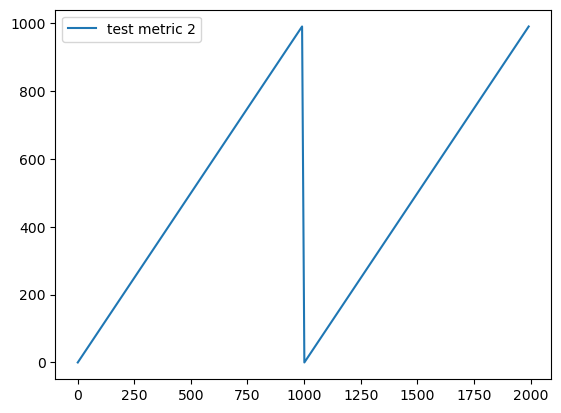

In [4]:
learner.logger.plot("test metric 2")

In [6]:
l2 = Learner.from_checkpoint(r"F:\Stuff\Programming\AI\glio_diff\glio\train\checkpoints\test\0-1000; testloss=0.24177; testacc=0.06458", CNN(), [], optimizer=opt)

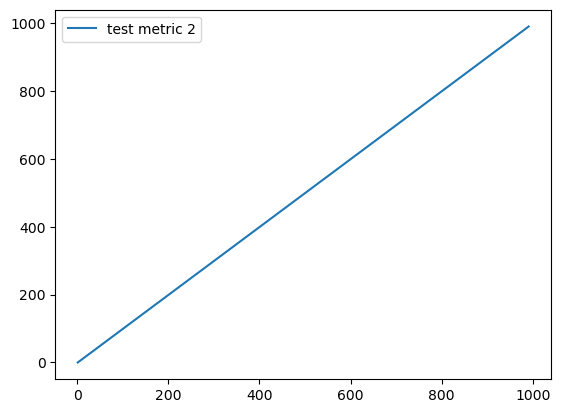

In [7]:
l2.logger.plot("test metric 2")